In [615]:
%pylab inline 


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\ipobo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['degrees', 'random', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [616]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import igraph as ig
import hypernetx as hnx
from hypernetx import drawing
import hypernetx.algorithms.generative_models as gm
import hypernetx.algorithms.hypergraph_modularity as hmod
import hnxwidget as hnxw
import scipy as sc
#import graphviz
import math
import warnings
from collections import defaultdict
import pandas as pd
from hypernetx import Hypergraph
from networkx.algorithms.community import k_clique_communities

from netgraph import Graph
import community
from community import community_louvain
from collections import Counter

from itertools import chain
import matplotlib.patches as mpatches
import time

from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim

In [617]:
def grapher(n, m, p, x):
    if ((n == 0 or m == 0) and p == 0):
        H = hnx.Hypergraph(x)
    else:
        H = gm.erdos_renyi_hypergraph(n, m, p)
    return H

def drawer(H):
    rubberband = hnx.drawing.rubber_band.draw(H)
    #try:    
    #    bipartit = hnx.drawing.two_column.draw(H)
    #except:
    #    print("No Bipartit for this one")
    #else:
    #    print("Nothing went wrong")
    normal = hmod.two_section(H)
    
    
    return rubberband, normal

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

start = time.time()

K = 10



# julia --project abcdh.jl -n 1000 -d 2.5,3,30 -c 1.5,10,100 -x 0.175 -q q.txt -w :linear -s 1234 -o 1000_0.175_linear 
# 0.0, 0.12362392356456453, 0.1163917904464303, 0.10460607027403673, 0.1196273266137165, 0.10000170999375743, 0.11124505934910392, 0.08900508721322702, 0.09249172354568978, 0.14300730899947367

In [618]:
fallout3 = pd.read_csv('./{0}th_run/1000_0.0_linear_he.txt'.format(K), delimiter="  ", header = None).to_dict()[0]

comms = np.loadtxt('./{0}th_run/1000_0.0_linear_comm.txt'.format(K))
assign = np.loadtxt('./{0}th_run/1000_0.0_linear_assign.txt'.format(K))
deg = np.loadtxt('./{0}th_run/1000_0.0_linear_deg.txt'.format(K))

f03 = {key: list(map(int, value.split())) for key, value in fallout3.items()}

for i in range(0, len(list(f03.keys()))):
    newkeys = (['l' + str(x) for x in range(len(f03))])
    f03[newkeys[i]]=f03.pop(list(f03.keys())[0])


C:\Users\ipobo\AppData\Local\Temp\ipykernel_20960\3947927484.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fallout3 = pd.read_csv('./{0}th_run/1000_0.0_linear_he.txt'.format(K), delimiter="  ", header = None).to_dict()[0]


# Plots

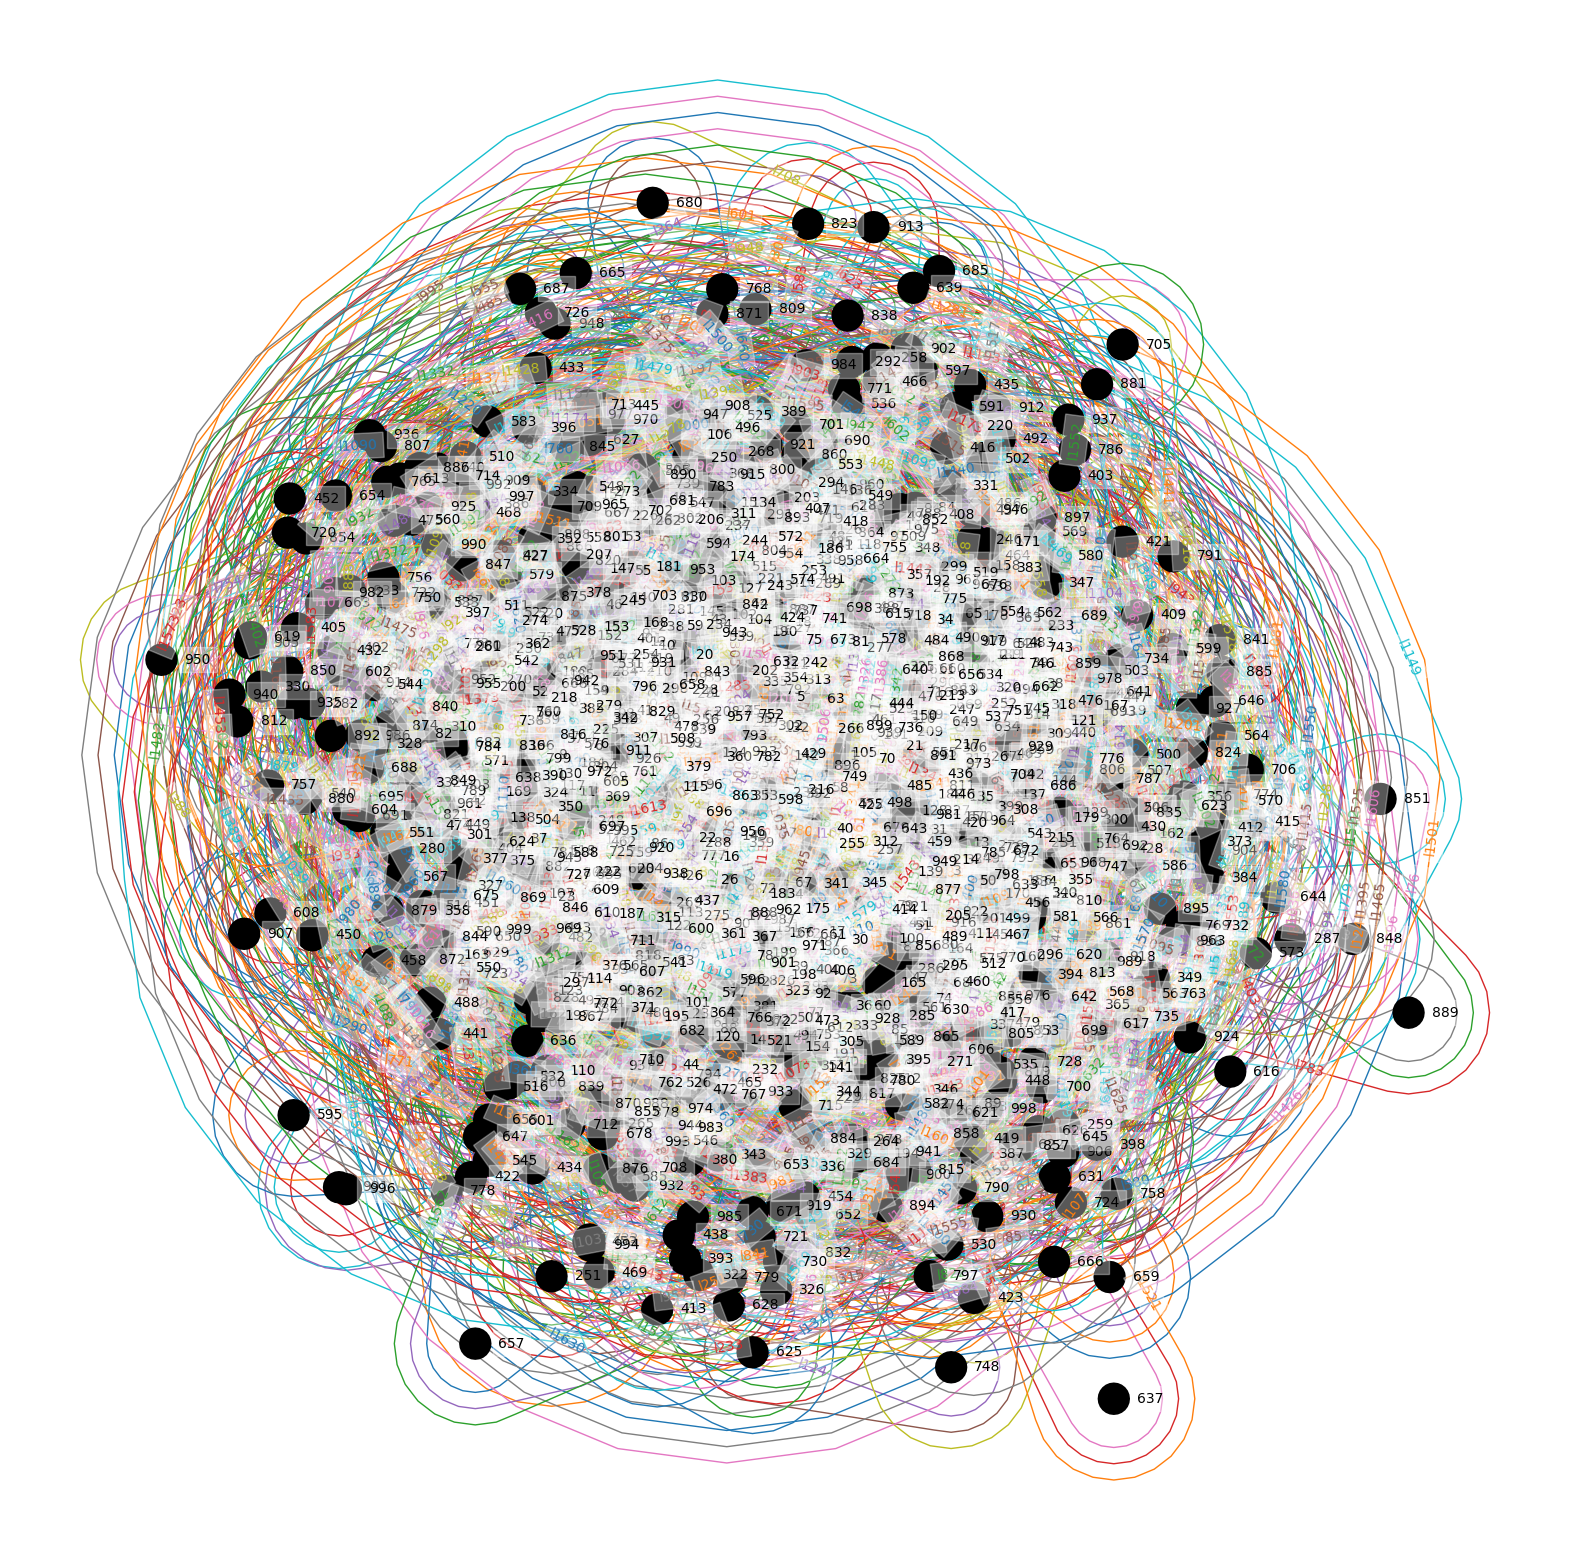

In [619]:
f03p = grapher(0 ,0 ,0 ,f03)
f03p_1, f03p_2 = drawer(f03p)

plt.rcParams['figure.figsize'] = [20, 20]

#print("Hyperedges for 0.5 linear -- fallout:")
#f03p_1

In [620]:
G = nx.Graph()
names = f03p_2.vs['name']
G.add_nodes_from(names)
G.add_edges_from([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

#nx.draw_networkx(G, pos=None, arrows=None, with_labels=True)


### Weighting

In [621]:
sizes = []

for i in range(0, len(f03)):    
    result = [f03[key] for key in f03.keys()]
    sizes.append(len(result[i]))



C:\Users\ipobo\AppData\Local\Temp\ipykernel_20960\1345658654.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_S, bin_edges_S = sc.histogram(sizes, bins=[1,2,3,4,5,6,7,8,9,10])


Text(0.5, 1.0, 'Hypergraph Edge size distribution')

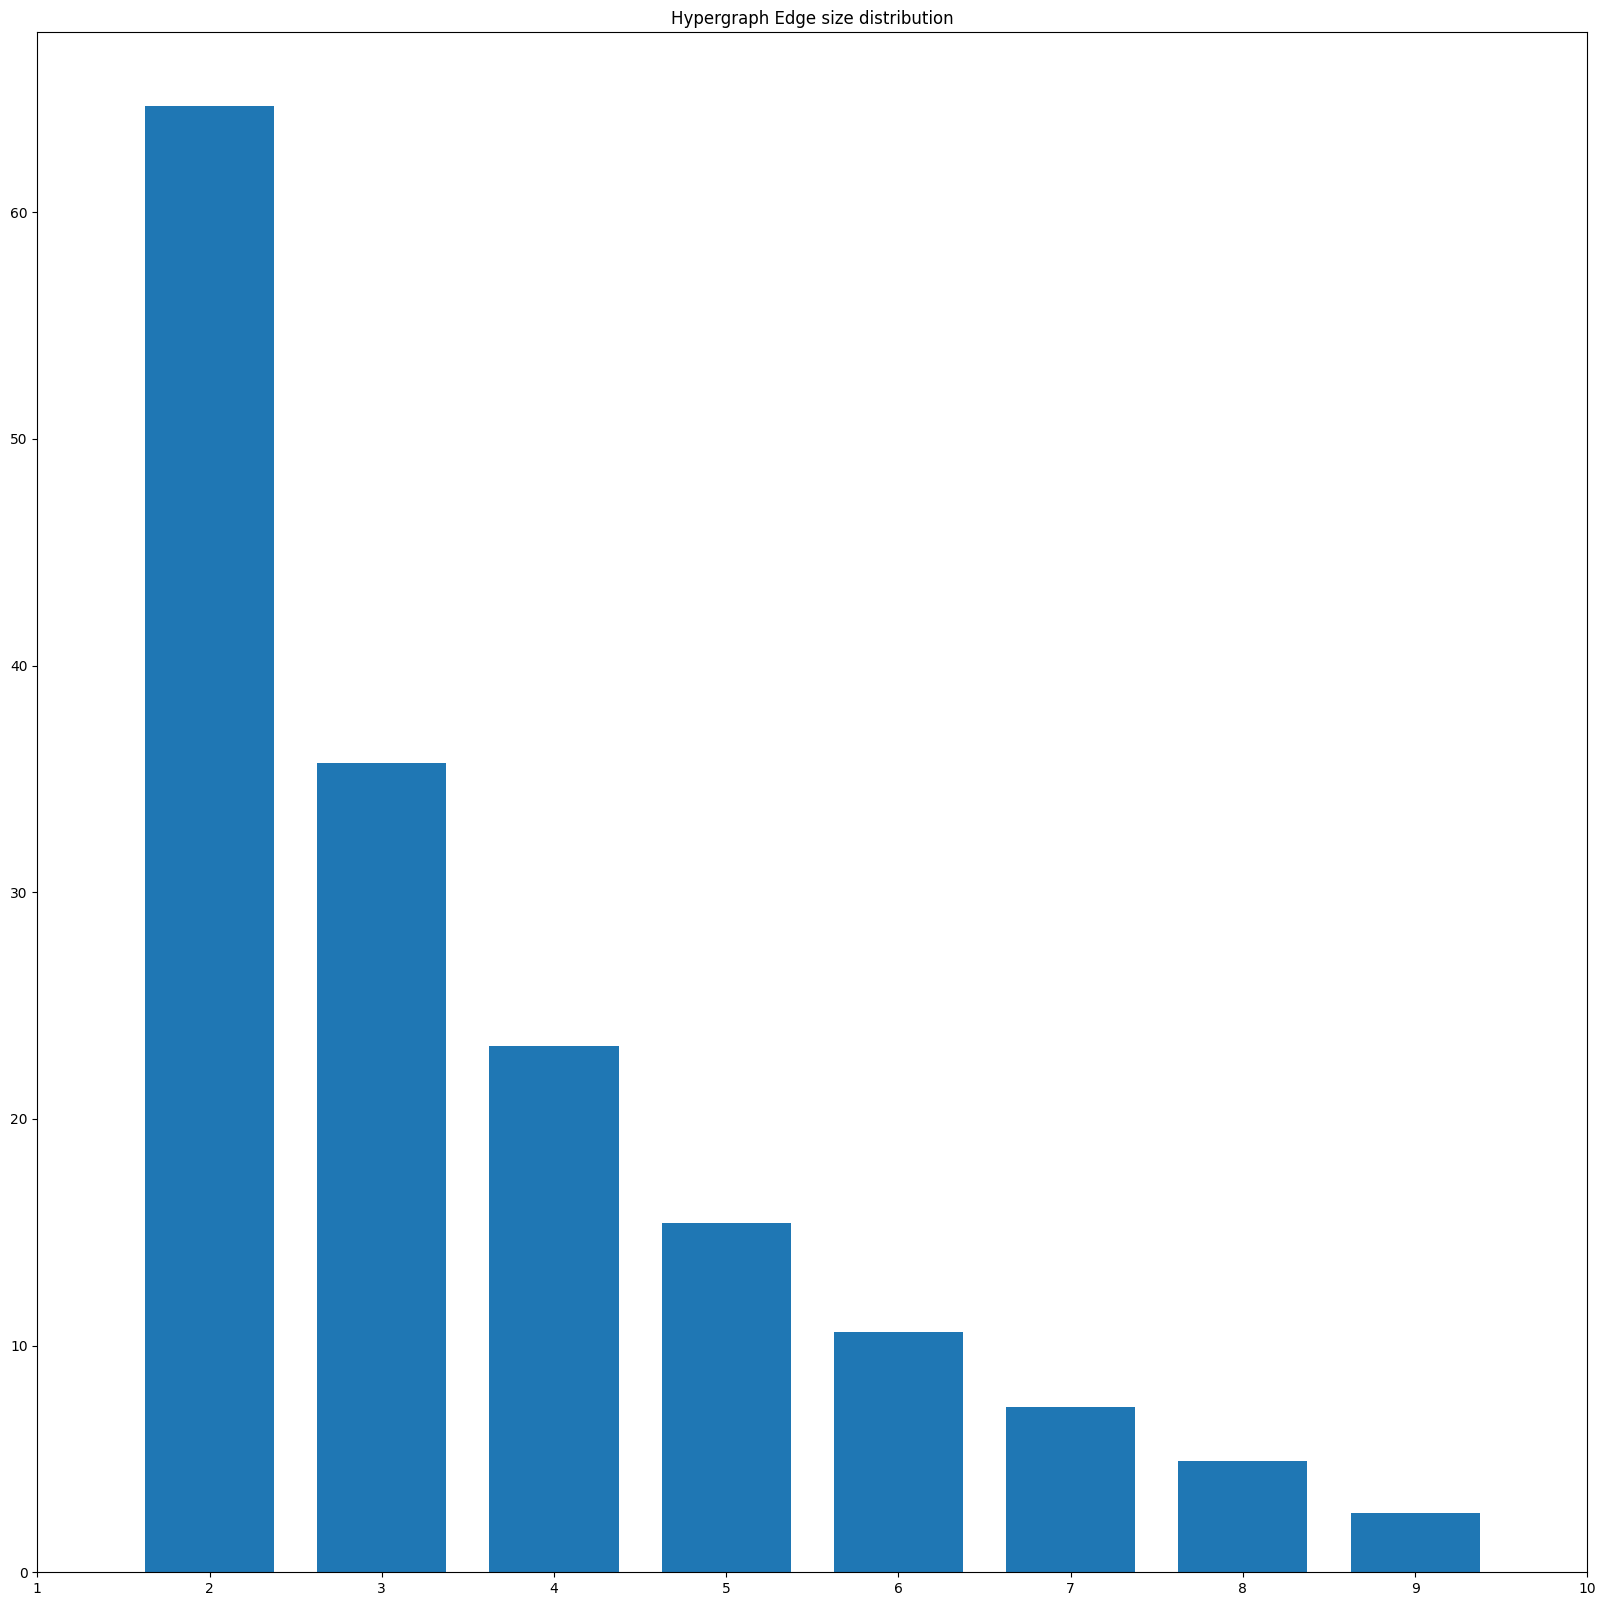

In [622]:
hist_S, bin_edges_S = sc.histogram(sizes, bins=[1,2,3,4,5,6,7,8,9,10])

plt.xlim(min(bin_edges_S), max(bin_edges_S))
plt.bar(bin_edges_S[:-1], hist_S/10,  width = 0.75)
plt.title('Hypergraph Edge size distribution')


In [623]:
nxlist = ([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

w = np.array(np.zeros(len(nxlist)))

for i in range(0, len(nxlist)):
    for l in range(0, len(f03)):
        if (nxlist[i][0] in [f03[key] for key in f03.keys()][l]) and (nxlist[i][1] in [f03[key] for key in f03.keys()][l]):
           w[i] += (1/(len([f03[key] for key in f03.keys()][l])-1)) 

w

array([1.83333333, 0.5       , 1.33333333, ..., 0.2       , 0.125     ,
       0.5       ])

In [624]:

sorted(list(set(w)))

[0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.25,
 0.26785714285714285,
 0.2857142857142857,
 0.29166666666666663,
 0.30952380952380953,
 0.325,
 0.3333333333333333,
 0.34285714285714286,
 0.3666666666666667,
 0.375,
 0.39285714285714285,
 0.4,
 0.4107142857142857,
 0.41666666666666663,
 0.42857142857142855,
 0.45,
 0.4583333333333333,
 0.47619047619047616,
 0.49166666666666664,
 0.4916666666666667,
 0.5,
 0.5095238095238095,
 0.5333333333333333,
 0.5416666666666666,
 0.5428571428571429,
 0.5595238095238095,
 0.5833333333333333,
 0.5928571428571429,
 0.6166666666666667,
 0.6190476190476191,
 0.625,
 0.6428571428571428,
 0.6583333333333333,
 0.6666666666666666,
 0.6761904761904762,
 0.7,
 0.726190476190476,
 0.7261904761904762,
 0.7333333333333334,
 0.75,
 0.7678571428571428,
 0.7833333333333332,
 0.7833333333333333,
 0.7857142857142856,
 0.7916666666666666,
 0.8333333333333333,
 0.8428571428571427,
 0.8666666666666666,
 0.8666666666666667,
 0.8928571428571428,
 0.8999999

In [625]:
nxlistnew = []
for k in range(0, len(w)):
    nxlistnew.append(nxlist[k] + (w[k], ))
    
nxlistnew

[(8, 180, 1.8333333333333333),
 (8, 193, 0.5),
 (8, 57, 1.3333333333333333),
 (8, 184, 0.8928571428571428),
 (8, 820, 0.2),
 (8, 49, 0.5),
 (8, 464, 0.16666666666666666),
 (8, 346, 0.25),
 (8, 87, 0.2),
 (8, 872, 0.14285714285714285),
 (8, 905, 0.3333333333333333),
 (8, 69, 0.47619047619047616),
 (8, 32, 0.3333333333333333),
 (8, 410, 0.16666666666666666),
 (8, 53, 0.25),
 (8, 529, 1.0),
 (8, 28, 0.14285714285714285),
 (8, 19, 0.3333333333333333),
 (8, 569, 0.16666666666666666),
 (8, 295, 0.3333333333333333),
 (8, 11, 0.2),
 (8, 82, 0.14285714285714285),
 (8, 185, 0.14285714285714285),
 (8, 402, 0.3333333333333333),
 (8, 39, 0.2),
 (8, 101, 0.14285714285714285),
 (8, 486, 1.0),
 (8, 7, 0.16666666666666666),
 (8, 533, 0.5),
 (8, 882, 0.5),
 (8, 880, 0.3333333333333333),
 (8, 116, 1.75),
 (8, 879, 0.2),
 (8, 519, 0.25),
 (8, 980, 1.25),
 (8, 357, 0.14285714285714285),
 (8, 374, 0.25),
 (8, 739, 0.5),
 (8, 330, 0.5),
 (8, 332, 0.5),
 (8, 319, 0.2),
 (8, 85, 0.25),
 (8, 576, 0.142857142857

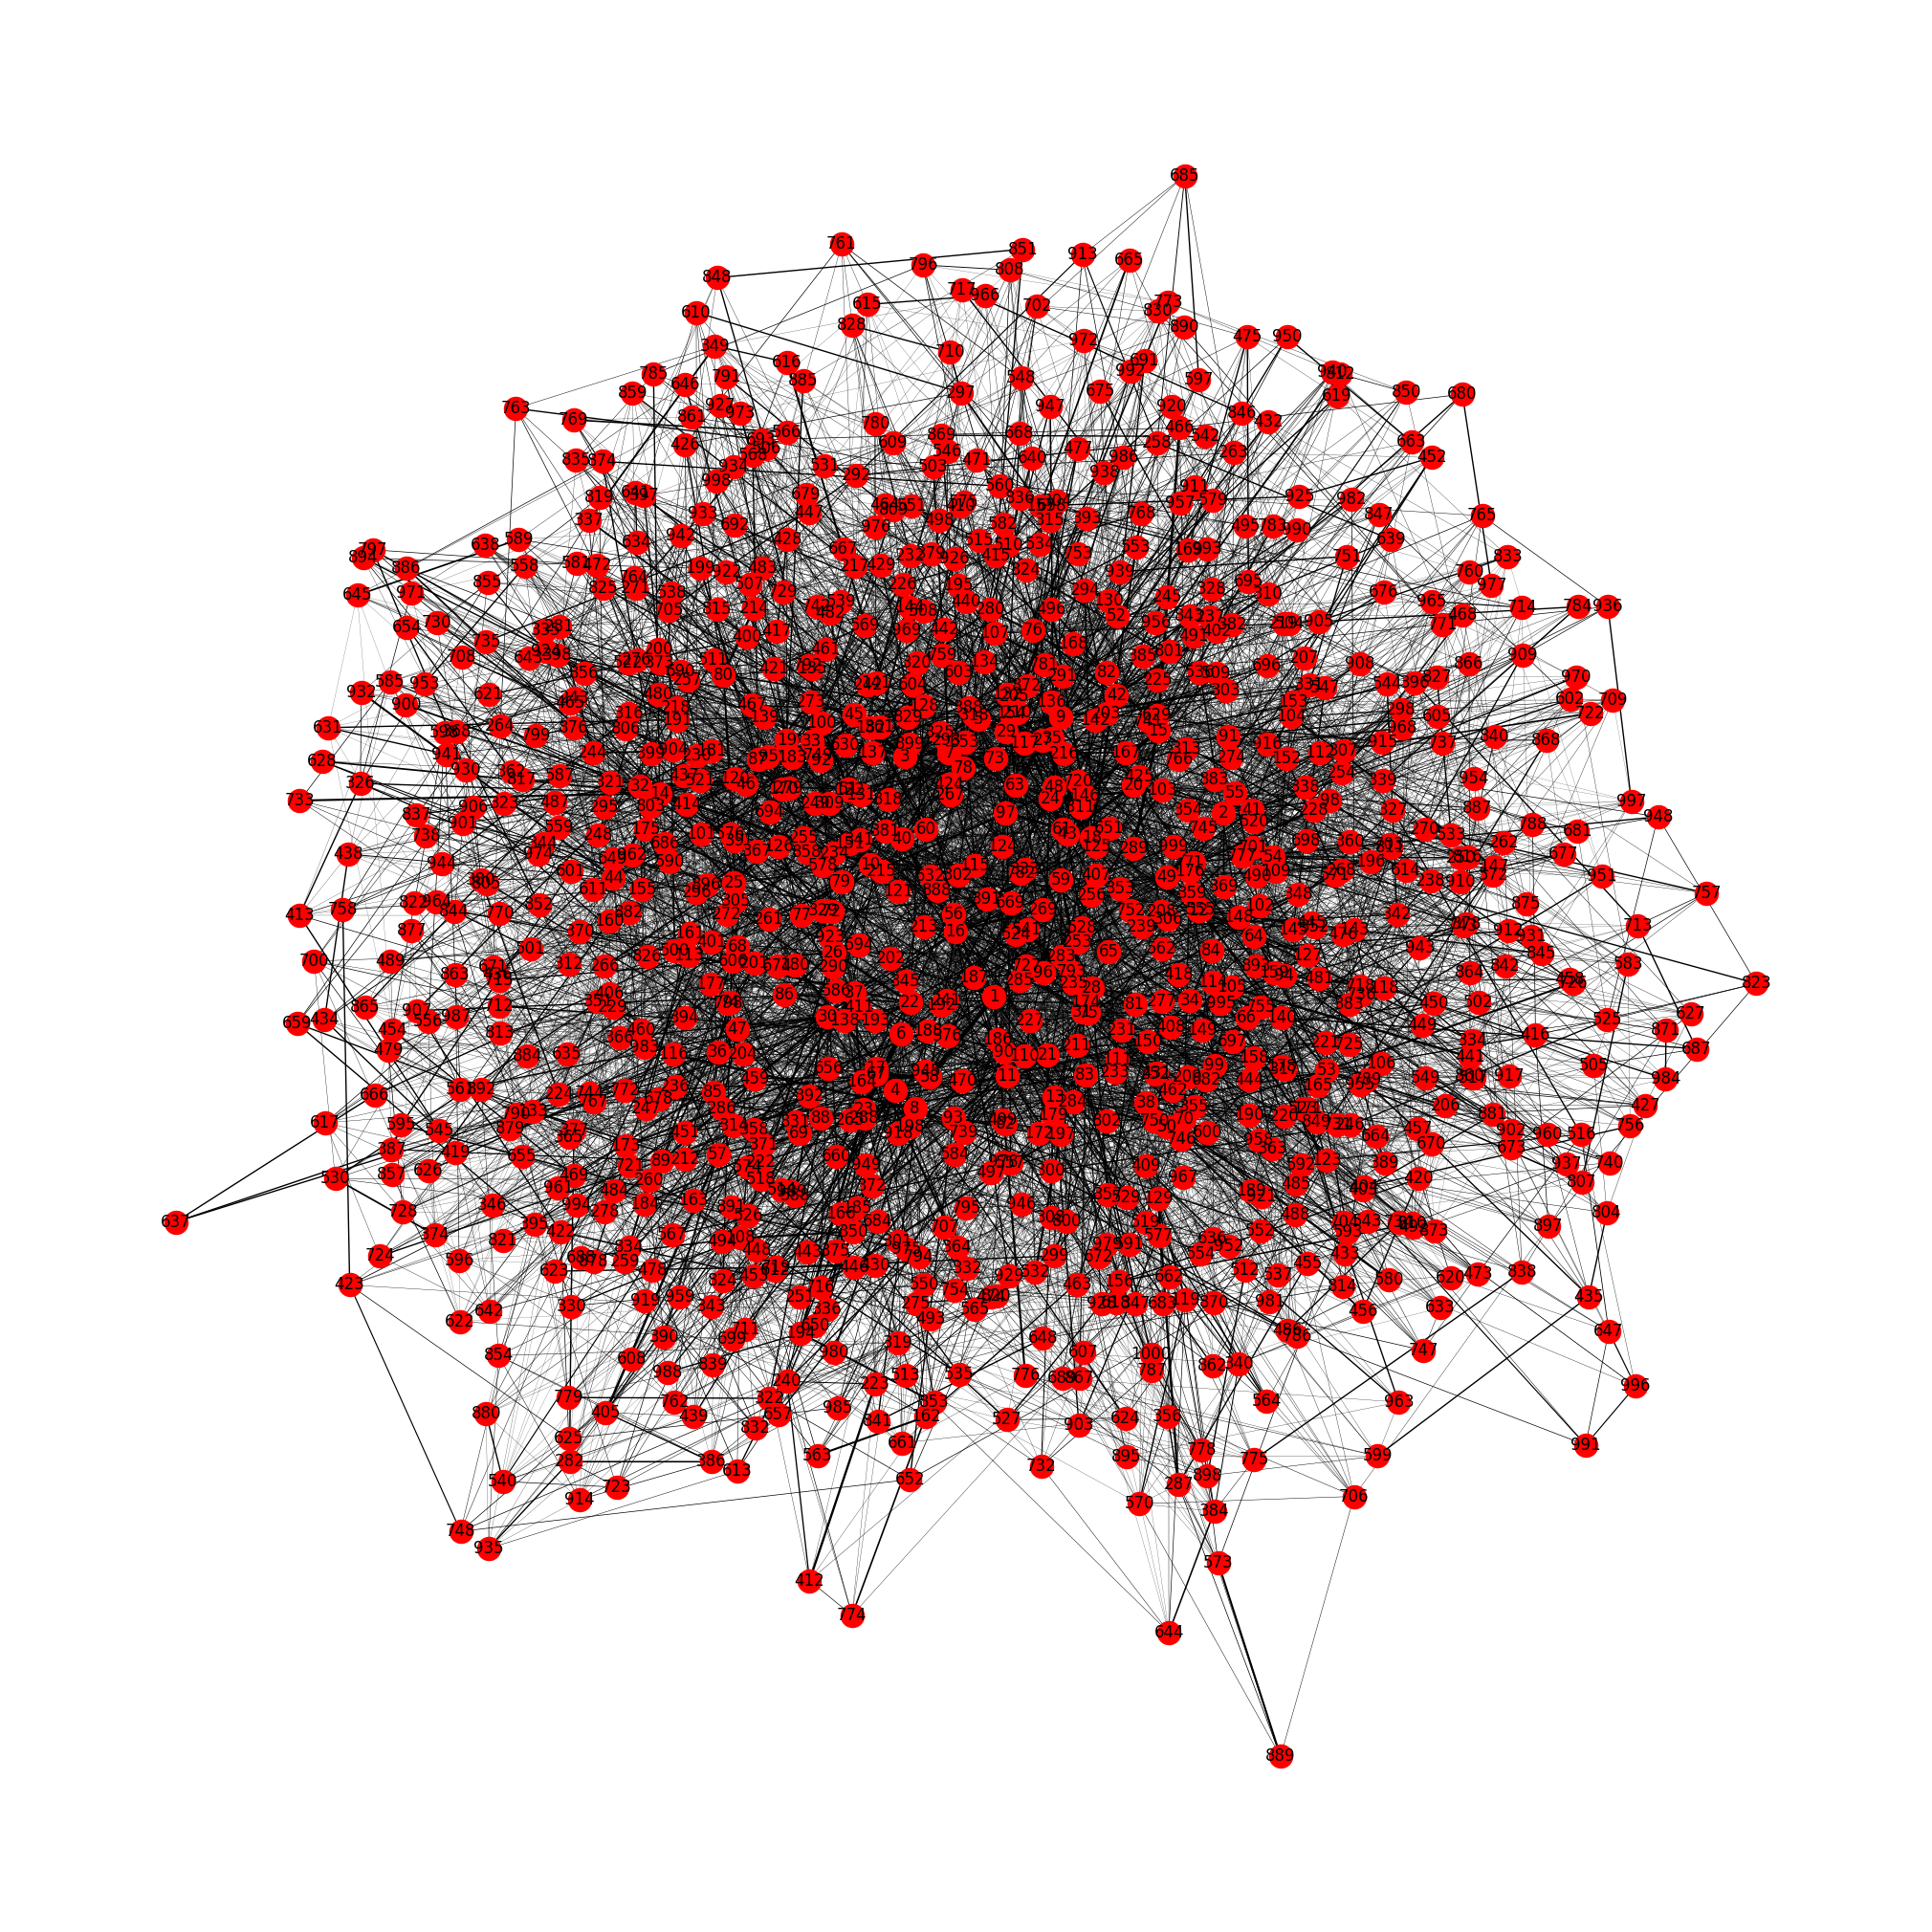

In [626]:
G2 = nx.Graph() 
G2.add_weighted_edges_from(nxlistnew)

edges,weights = zip(*nx.get_edge_attributes(G2,'weight').items())

pos = nx.spring_layout(G2)

#nx.draw(G2, pos, node_color='r',with_labels=True, edgelist=edges, edge_color = weights, width=10.0, edge_cmap=plt.cm.Greens)

nx.draw(G2, pos, node_color='r',with_labels=True, edgelist=edges, width=weights)

#plt.savefig('edges.png')

# Information and histograms

In [627]:
communities3 = list(k_clique_communities(G2, 3, cliques=None))

print('The community sizes as per our generator are:', comms)

for i in range(0, len(communities3)):
    communities3[i] = sorted(list(communities3[i]))
    if len(communities3[i]) == max(comms):
        print('The longest comm is:', communities3[i])

print('With Max community size =', max(comms))

The community sizes as per our generator are: [81. 61. 60. 56. 56. 54. 49. 45. 40. 36. 35. 35. 34. 28. 25. 22. 21. 21.
 20. 19. 17. 16. 16. 15. 15. 14. 14. 12. 11. 11. 11. 10. 10. 10. 10. 10.]
With Max community size = 81.0


In [628]:
print('Az átlag fokszám a hipergráfon belül:', np.average(deg))

degrees = [G.degree(n) for n in G.nodes()]
print('Az átlag fokszám a kivetített hálón:', np.average(degrees))

Az átlag fokszám a hipergráfon belül: 5.836
Az átlag fokszám a kivetített hálón: 18.06


C:\Users\ipobo\AppData\Local\Temp\ipykernel_20960\2395623677.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_S, bin_edges_S = sc.histogram(sizes, bins=[1,2,3,4,5,6,7,8,9,10])
C:\Users\ipobo\AppData\Local\Temp\ipykernel_20960\2395623677.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_W, bin_edges_W = sc.histogram(w, sorted(list(set(np.array(np.linspace(0, 2, 101))))))


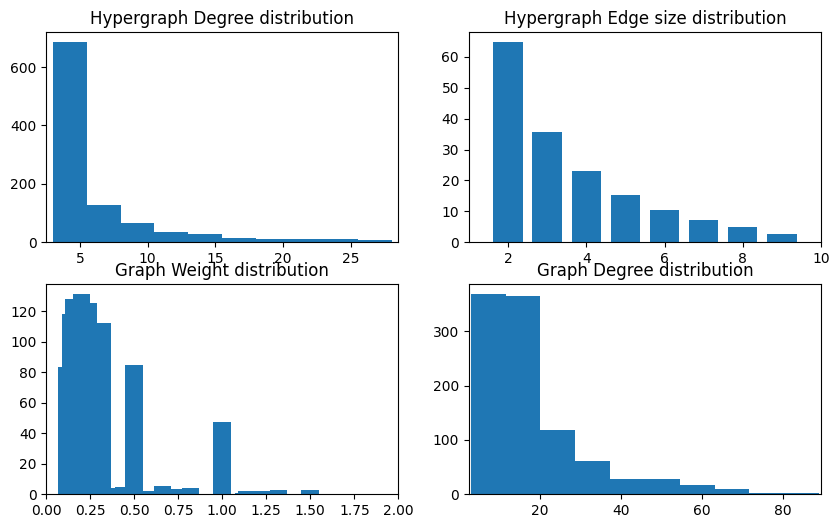

In [629]:
hist_S, bin_edges_S = sc.histogram(sizes, bins=[1,2,3,4,5,6,7,8,9,10])
hist_W, bin_edges_W = sc.histogram(w, sorted(list(set(np.array(np.linspace(0, 2, 101))))))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes[0][0].set_xlim([min(deg)-0.5, max(deg)+0.5])
axes[0][0].hist(deg)
axes[0][0].set_title('Hypergraph Degree distribution')

axes[0][1].set_xlim(min(bin_edges_S), max(bin_edges_S))
axes[0][1].bar(bin_edges_S[:-1], hist_S/10,  width = 0.75)
axes[0][1].set_title('Hypergraph Edge size distribution')

axes[1][0].set_xlim(min(bin_edges_W), max(bin_edges_W))
axes[1][0].bar(bin_edges_W[:-1], hist_W/10, width = 0.1)
axes[1][0].set_title('Graph Weight distribution')

axes[1][1].set_xlim([min(degrees)-0.5, max(degrees)+0.5])
axes[1][1].hist(degrees)
axes[1][1].set_title('Graph Degree distribution')

#csoportméreteloszlás


plt.show()

In [630]:
with open(r'./w/w_%s.txt' % K, 'w') as file10:
    for d in w:
        file10.write(f"{d}\n")
    
with open(r'./sizes/sizes_%s.txt' % K, 'w') as file11:
    for d in sizes:
        file11.write(f"{d}\n")
    
with open(r'./degrees/G_deg_%s.txt' % K, 'w') as file12:
    for d in degrees:
        file12.write(f"{d}\n")
        

# Groups and colouring

### K_clique groups

In [631]:
def clique_coloring(graph, k):
    communities = []
    color_map=[]
    size=[]
    legend = []
    lista = []

    for i in range(0, len(list(k_clique_communities(graph, k, cliques=None)))):
        communities.append(sorted(list(k_clique_communities(graph, k))[i]))    
        
    number_of_colors = len(communities)

    color = ["#"+''.join([random.choice('0123456789ABCDEF') for k in range(6)])
                for l in range(number_of_colors)]
    
    trier = {color[i] : communities[i] for i in range(0, len(communities)) if (color[i] != '#FF0000' or color[i] != '#808080')}

    for node in nodelist:
        if node in list(chain(*trier.values())):
            if (list(chain(*trier.values())).count(node) == 1):
                #color_map.append('green')
                for i in range(0, len(list(trier.values()))):
                    if (node in list(trier.values())[i]) == True:
                        c = color[i] 
                        color_map.append(c)
            else:
                color_map.append('#FF0000')
        else:
            color_map.append('#808080')


    for i in range (0, len(color_map)):
        if color_map[i] == '#FF0000':
            size.append(600)
        elif color_map[i] == '#808080':
            size.append(250)
        else:
            size.append(450)
        
    for i in range(0, len(communities)):
        legend.append(mpatches.Patch(color=color[i], label=(communities[i])))
        lista = legend + [mpatches.Patch(color= '#FF0000', label='Multigroups'), mpatches.Patch(color= '#808080', label='0 groups')]
    
    if communities == []:
        print('No groups for k =', k)
    else:
        nx.draw(graph, pos = nx.kamada_kawai_layout(graph)  , node_color=color_map ,with_labels=True, node_size = size, edgelist=edges, width=weights)
        plt.legend('csop:színek', loc='upper left')

        plt.legend(handles = [lista[i] for i in range(0, len(lista))])

        plt.show()
    
    return(communities)

In [632]:
#comm3 = clique_coloring(G2, 3)
#comm3

In [633]:
#comm4 = clique_coloring(G2, 4)

In [634]:
#comm5 = clique_coloring(G2, 5)
#comm5

# Susceptibility and Weight levels

In [635]:
nodelist = []
for nodes in G2.nodes():
    nodelist.append(nodes)

In [636]:
def swissknife(N):
    
    weighted_dict = {}
    graphs = {}
    communities = {}
    community_sizes = {}
    susceptibility = []
    ABCD_groups = {}
    clique_groups = {}
    clique_groups_leftout = {}
    groups_k = {}
    groups_k_leftout = {}
    ngn_sg = {}
    non_grouped_nodes_sg = {}
    ngn = {}
    last_groups = {}

    weightlist = sorted(list(set(np.array(np.linspace(0, 2, 101)))))

    for i in range(1, len(assign)+1):
        ABCD_groups[i] = [int(assign[i-1])]

    for l in range(0, len(weightlist)):
        weighted_dict['weightup_%s' % weightlist[l]] = []
        graphs['graph_%s' % l] =  nx.Graph() 
        communities['c_%s' % l] = []
        community_sizes['c_%s' % l] = []
        ngn_sg['w_%s' % weightlist[l]] = nx.Graph()
        non_grouped_nodes_sg['w_%s' % weightlist[l]] = []
        ngn['w_%s' % weightlist[l]] = []
        
        weighted_dict['weightup_%s' % weightlist[l]] = [(u, v, d) for (u, v, d) in nxlistnew if d > weightlist[l]]
        graphs['graph_%s' % l].add_weighted_edges_from(weighted_dict['weightup_%s' % weightlist[l]])

        for i in range(0, len(list(k_clique_communities(graphs['graph_%s' % l], N, cliques=None)))):
            communities['c_%s' % l].append(sorted(list(k_clique_communities(graphs['graph_%s' % l], N))[i]))
            
        for k in range(0, len(communities['c_%s' % l])):  
            community_sizes['c_%s' % l].append(len(communities['c_%s' % l][k]))     
        
        """
        with open(r'./comm_sizes/comms{0}_{1}_{2}.txt'.format(N, weightlist[l], K), 'w') as file:
            for d in community_sizes['c_%s' % l]:
                file.write(f"{d}\n")  
                
        """
            
        if (sum(community_sizes['c_%s' % l][1:])) == 0.0:
            susceptibility.append(0.0)
        else:        
            susceptibility.append((((sum(sorted(community_sizes['c_%s' % l],reverse=True)[1:]))**2)/(len(community_sizes['c_%s' % l])-1))/1000000)
        #community_sizes['c_%s' % l] = (len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l])))

        if len(communities['c_%s' % l]) == 0:
            communities['c_%s' % l] = [[]]

    #for i in range(0, len(weightlist)):
        groups_k['w_%s' % weightlist[l]] = {}
        clique_groups['w_%s' % weightlist[l]] = {}
        #conn_comp['w_%s' % weightlist[l]] = {}
        for j in range(1, len(list(k_clique_communities(graphs['graph_%s' % l], N, cliques=None))) + 1):
            groups_k['w_%s' % weightlist[l]][j] = []
            #conn_comp['w_%s' % weightlist[l]][j] = []
            groups_k['w_%s' % weightlist[l]][j] = (sorted(list(k_clique_communities(graphs['graph_%s' % l], N))[j-1]))
            #conn_comp['w_%s' % weightlist[l]][j] = len(sorted(list(k_clique_communities(graphs['graph_%s' % l], 2))[j-1]))
        for k in groups_k['w_%s' % weightlist[l]]:
            for v in groups_k['w_%s' % weightlist[l]][k]:
                clique_groups['w_%s' % weightlist[l]].setdefault(v, []).append(k)
        for j in [x for x in range(1,max(nodelist)+1) if x not in (list(dict((v, [k]) for k in groups_k['w_%s' % weightlist[l]] for v in groups_k['w_%s' % weightlist[l]][k]).keys()))]:
            #clique_groups['w_%s' % weightlist[l]][j] = [j + len(groups_k['w_%s' % weightlist[l]])]
            clique_groups['w_%s' % weightlist[l]][j] = [0]

            non_grouped_nodes_sg['w_%s' % weightlist[l]].append(j)
            ngn['w_%s' % weightlist[l]] = (len(non_grouped_nodes_sg['w_%s' % weightlist[l]]))
        ngn_sg['w_%s' % weightlist[l]] = G2.subgraph(non_grouped_nodes_sg['w_%s' % weightlist[l]])

 
            
        groups_k_leftout['w_%s' % weightlist[l]] = {}
        clique_groups_leftout['w_%s' % weightlist[l]] = {}
        for j in range(1, len(list(k_clique_communities(ngn_sg['w_%s' % weightlist[l]], 2, cliques=None))) + 1):
            groups_k_leftout['w_%s' % weightlist[l]][j] = []
            #conn_comp['w_%s' % weightlist[l]][j] = []
            groups_k_leftout['w_%s' % weightlist[l]][j] = (sorted(list(k_clique_communities(ngn_sg['w_%s' % weightlist[l]], 2))[j-1]))
            #conn_comp['w_%s' % weightlist[l]][j] = len(sorted(list(k_clique_communities(graphs['graph_%s' % l], 2))[j-1]))
        for k in groups_k_leftout['w_%s' % weightlist[l]]:
            for v in groups_k_leftout['w_%s' % weightlist[l]][k]:
                clique_groups_leftout['w_%s' % weightlist[l]].setdefault(v, []).append(k + max(clique_groups['w_%s' % weightlist[l]]))           #############x
            
            
        last_groups['w_%s' % weightlist[l]] = {}
        last_groups['w_%s' % weightlist[l]] = merge_two_dicts(clique_groups['w_%s' % weightlist[l]], clique_groups_leftout['w_%s' % weightlist[l]])
        
        for k in last_groups['w_%s' % weightlist[l]]:
            if last_groups['w_%s' % weightlist[l]][k] == [0]:
                last_groups['w_%s' % weightlist[l]][k]  = [k + 2*max(clique_groups['w_%s' % weightlist[l]])]                                         #############x
        
          
    no_of_comms = []
    comm_maxes = []

    for l in range(0, len(weightlist)-1):   
        no_of_comms.append(len(communities['c_%s' % l]))
        comm_maxes.append((max(len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l]))))/1000)
        
    comm_maxes = comm_maxes + [0]
    no_of_comms = no_of_comms + [0]  
    
    
    clustering_ABCD = Clustering(ABCD_groups)

    clustering_clique = {}

    similarities = []

    for i in range(1, len(clique_groups) + 1):
        clustering_clique[i] = Clustering(last_groups['w_%s' % weightlist[i-1]])
        similarities.append( sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9))
        #print("Element-centric Similarity No.%s:" %i, sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9) ) 
        

        
    #------------------------------------------------------------------------
        
    return(weightlist, susceptibility, comm_maxes, similarities, community_sizes, last_groups, ngn_sg)

        
    #------------------------------------------------------------------------

In [637]:
weightlist3, susceptibility3, comm_maxes3, similarities3, community_sizes3, last_groups3, ngn_sg3 = swissknife(3)

In [638]:
weightlist4, susceptibility4, comm_maxes4, similarities4, community_sizes4, last_groups4, ngn_sg4 = swissknife(4)

In [639]:
weightlist2, susceptibility5, comm_maxes5, similarities5, community_sizes5, last_groups5, ngn_sg5 = swissknife(5)

In [640]:
with open(r'./suss/sus3_%s.txt' % K, 'w') as file1:
    for d in susceptibility3:
        file1.write(f"{d}\n")
    
with open(r'./maxes/max3_%s.txt' % K, 'w') as file2:
    for d in comm_maxes3:
        file2.write(f"{d}\n")
    
with open(r'./sims/sim3_%s.txt' % K, 'w') as file3:
    for d in similarities3:
        file3.write(f"{d}\n")
        
with open(r'./ngns/ngn3_%s.txt' % K, 'w') as filea:
    for d in non_grouped_nodes3:
        filea.write(f"{d}\n")


In [641]:
with open(r'./suss/sus4_%s.txt' % K, 'w') as file4:
    for d in susceptibility4:
        file4.write(f"{d}\n")
    
with open(r'./maxes/max4_%s.txt' % K, 'w') as file5:
    for d in comm_maxes4:
        file5.write(f"{d}\n")
    
with open(r'./sims/sim4_%s.txt' % K, 'w') as file6:
    for d in similarities4:
        file6.write(f"{d}\n")

with open(r'./ngns/ngn4_%s.txt' % K, 'w') as fileb:
    for d in non_grouped_nodes4:
        fileb.write(f"{d}\n")


In [642]:
with open(r'./suss/sus5_%s.txt' % K, 'w') as file7:
    for d in susceptibility5:
        file7.write(f"{d}\n")
    
with open(r'./maxes/max5_%s.txt' % K, 'w') as file8:
    for d in comm_maxes5:
        file8.write(f"{d}\n")
    
with open(r'./sims/sim5_%s.txt' % K, 'w') as file9:
    for d in similarities5:
        file9.write(f"{d}\n")
        
with open(r'./ngns/ngn5_%s.txt' % K, 'w') as filec:
    for d in non_grouped_nodes5:
        filec.write(f"{d}\n")


In [643]:

with open(r'./weights.txt', 'w') as file:
    for d in weightlist3:
        file.write(f"{d}\n")


In [644]:
end = time.time()

print("The length of the run was:", (end - start)/60, "mins")

The length of the run was: 60.86043989260991 mins


# some additional

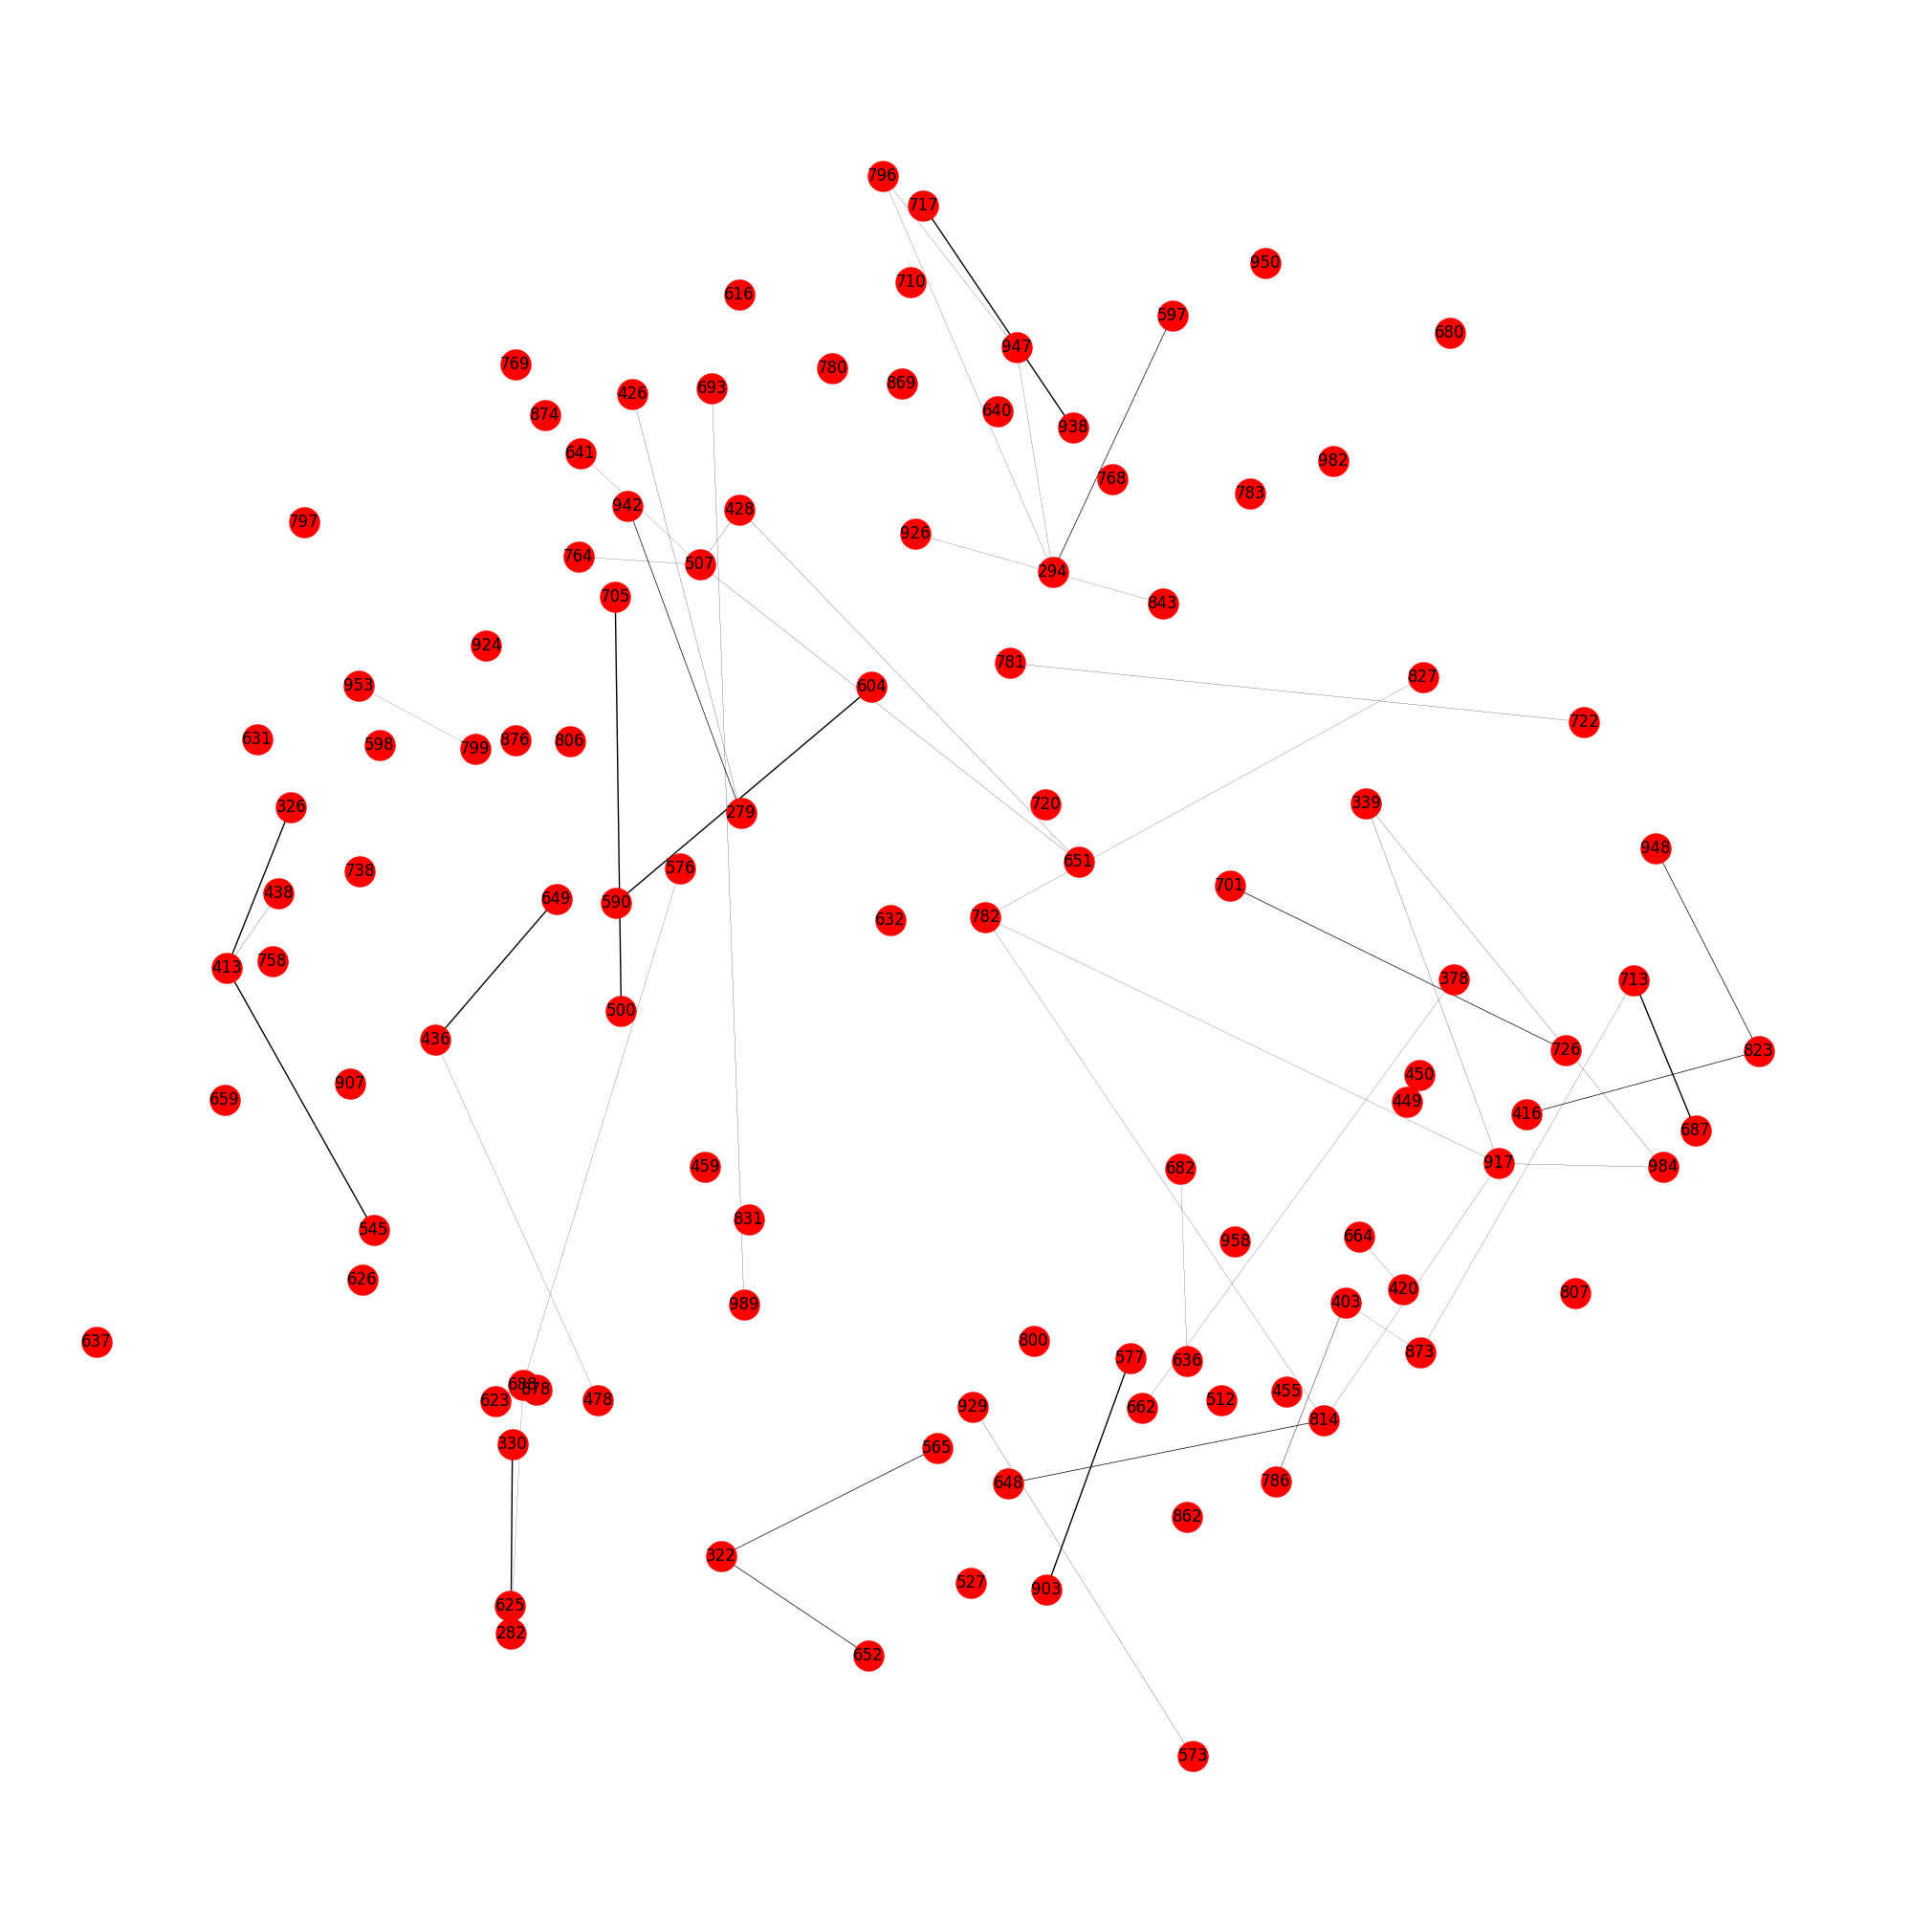

In [645]:
plt.rcParams['figure.figsize'] = [20, 20]

edgest_p, weightst_p = zip(*nx.get_edge_attributes(ngn_sg4['w_0.18'],'weight').items())

nx.draw(ngn_sg4['w_0.18'], pos, node_color='r',with_labels=True, edgelist=edgest_p, node_size = 500, width = weightst_p)

In [646]:
last_groups4['w_0.18'][729]

[7]

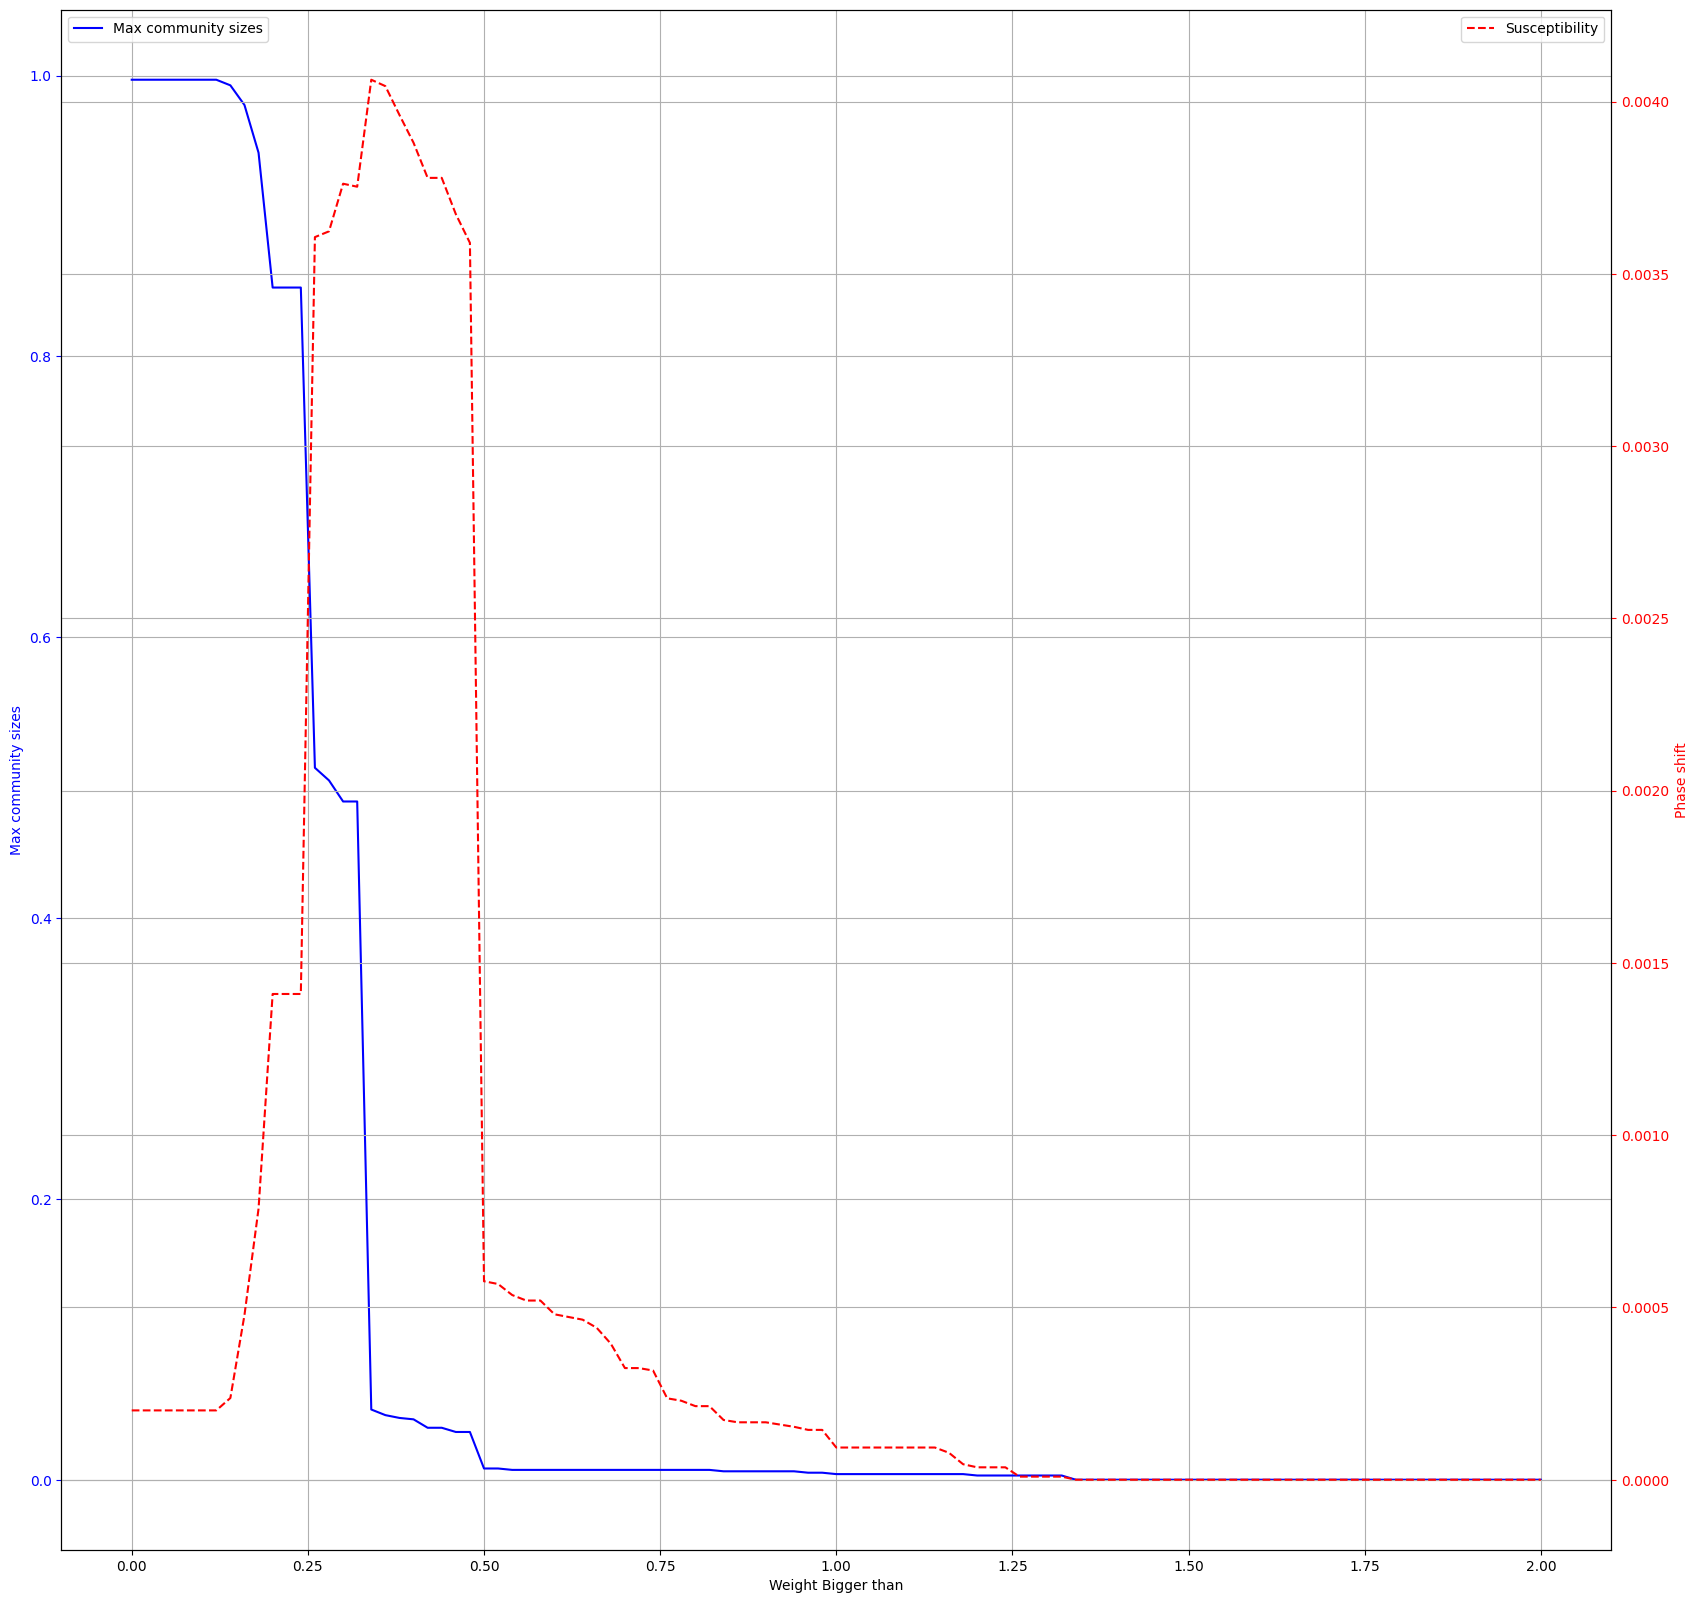

In [647]:
fig, ax = plt.subplots()

ax.plot(weightlist3, comm_maxes3, color="blue", label = "Max community sizes")                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue
plt.legend(loc = "upper left")

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist3, susceptibility3, color="red", linestyle = 'dashed', label = "Susceptibility")                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)
plt.legend()

plt.show()

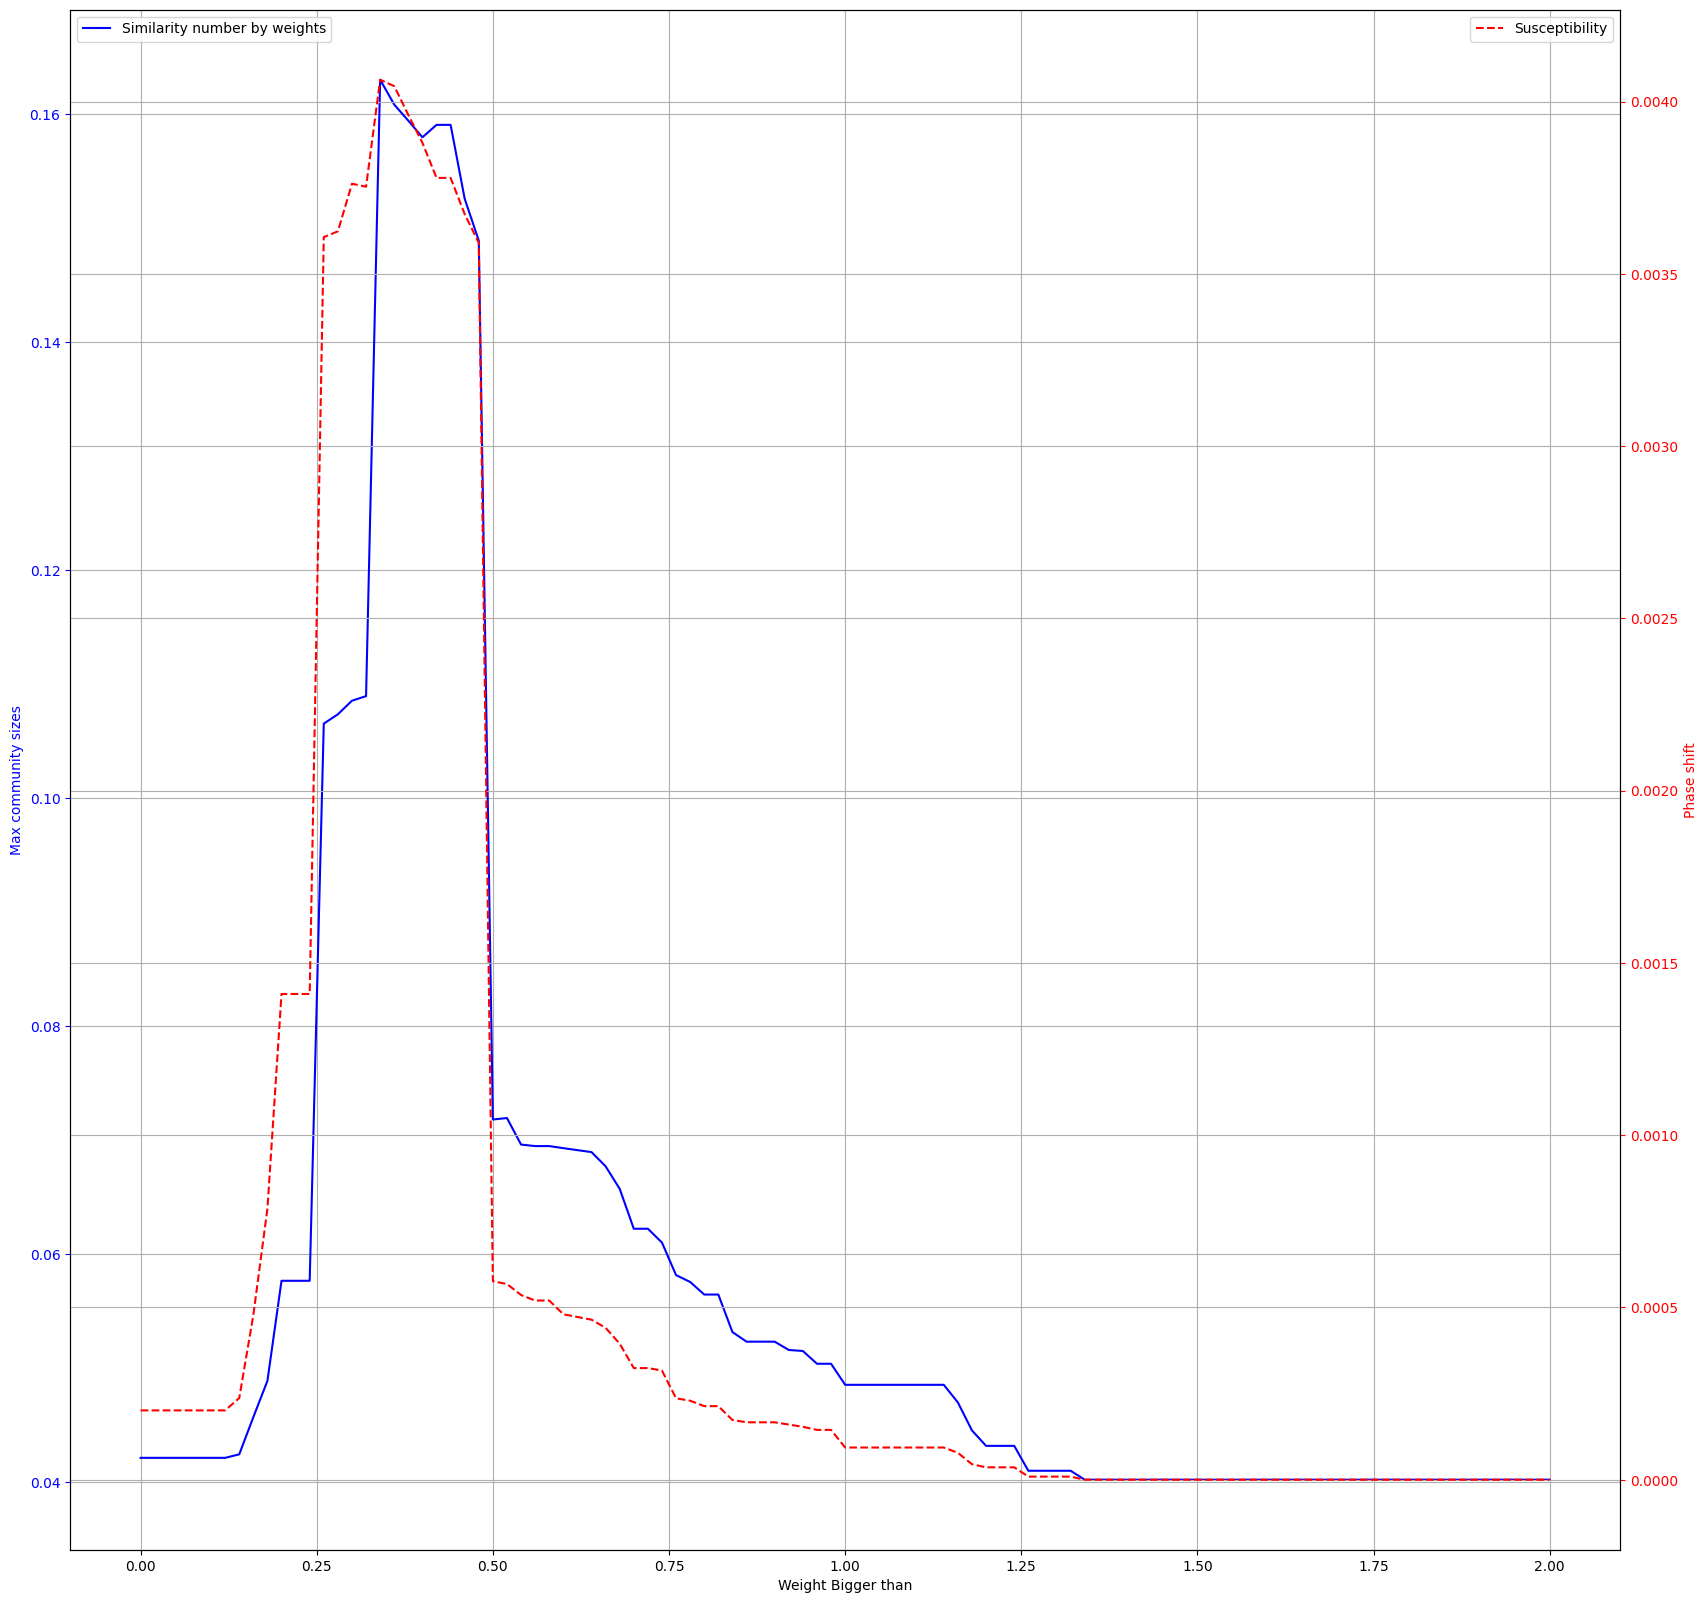

In [648]:
fig, ax = plt.subplots()

ax.plot(weightlist3, similarities3, color="blue", label = 'Similarity number by weights')                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue
plt.legend(loc = "upper left")

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist3, susceptibility3, color="red", linestyle = 'dashed', label = "Susceptibility")                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)
plt.legend()

plt.show()

In [649]:
len(weightlist2)

101

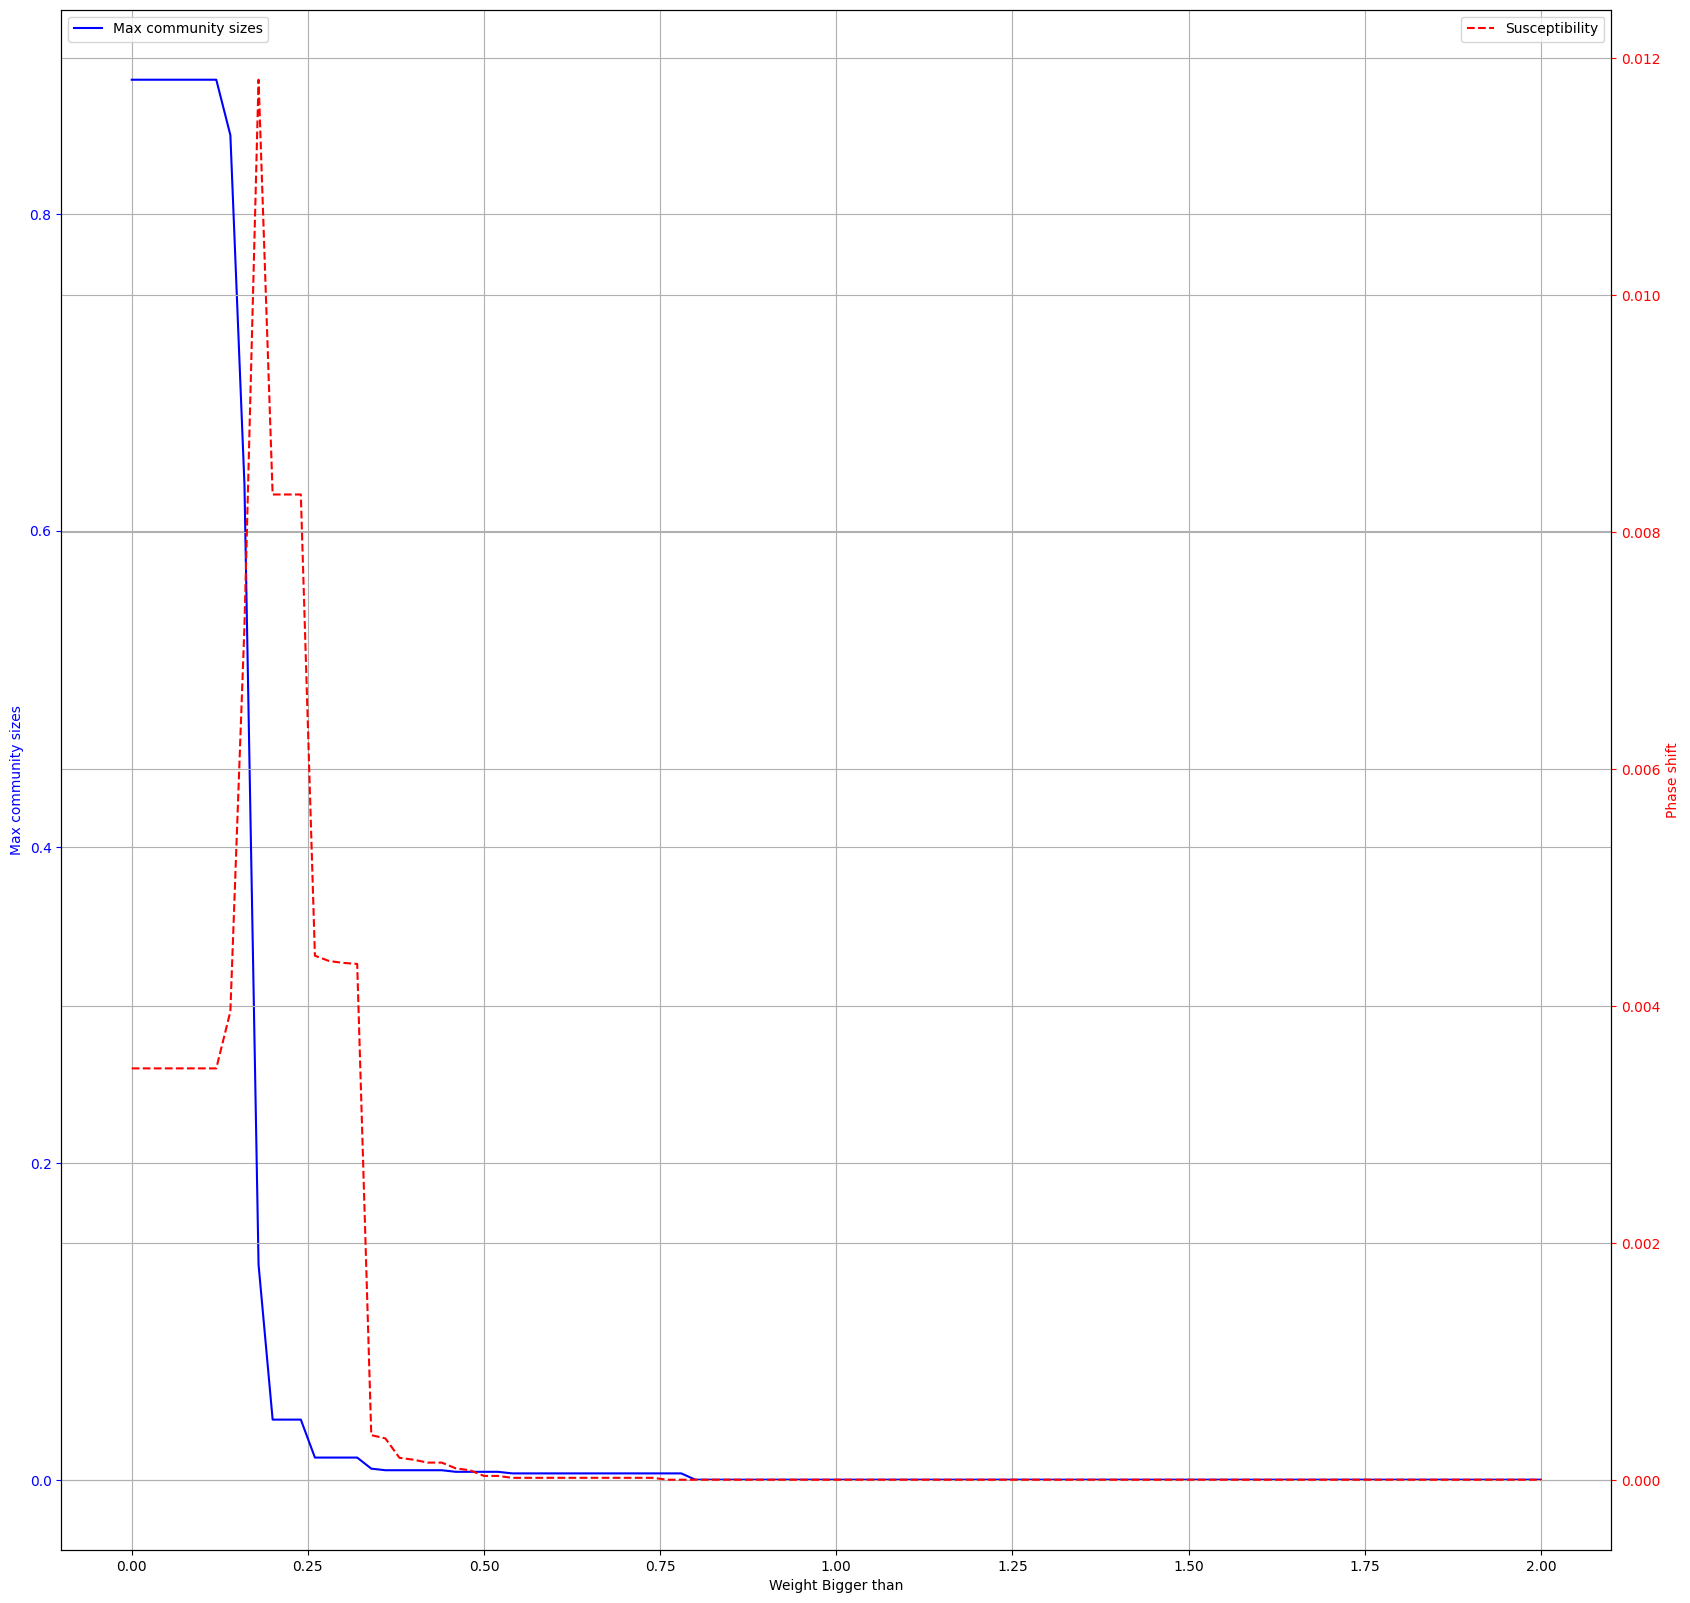

In [650]:
fig, ax = plt.subplots()

ax.plot(weightlist4, comm_maxes4, color="blue", label = "Max community sizes")                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue
plt.legend(loc = "upper left")

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist4, susceptibility4, color="red", linestyle = 'dashed', label = "Susceptibility")                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)
plt.legend()

plt.show()

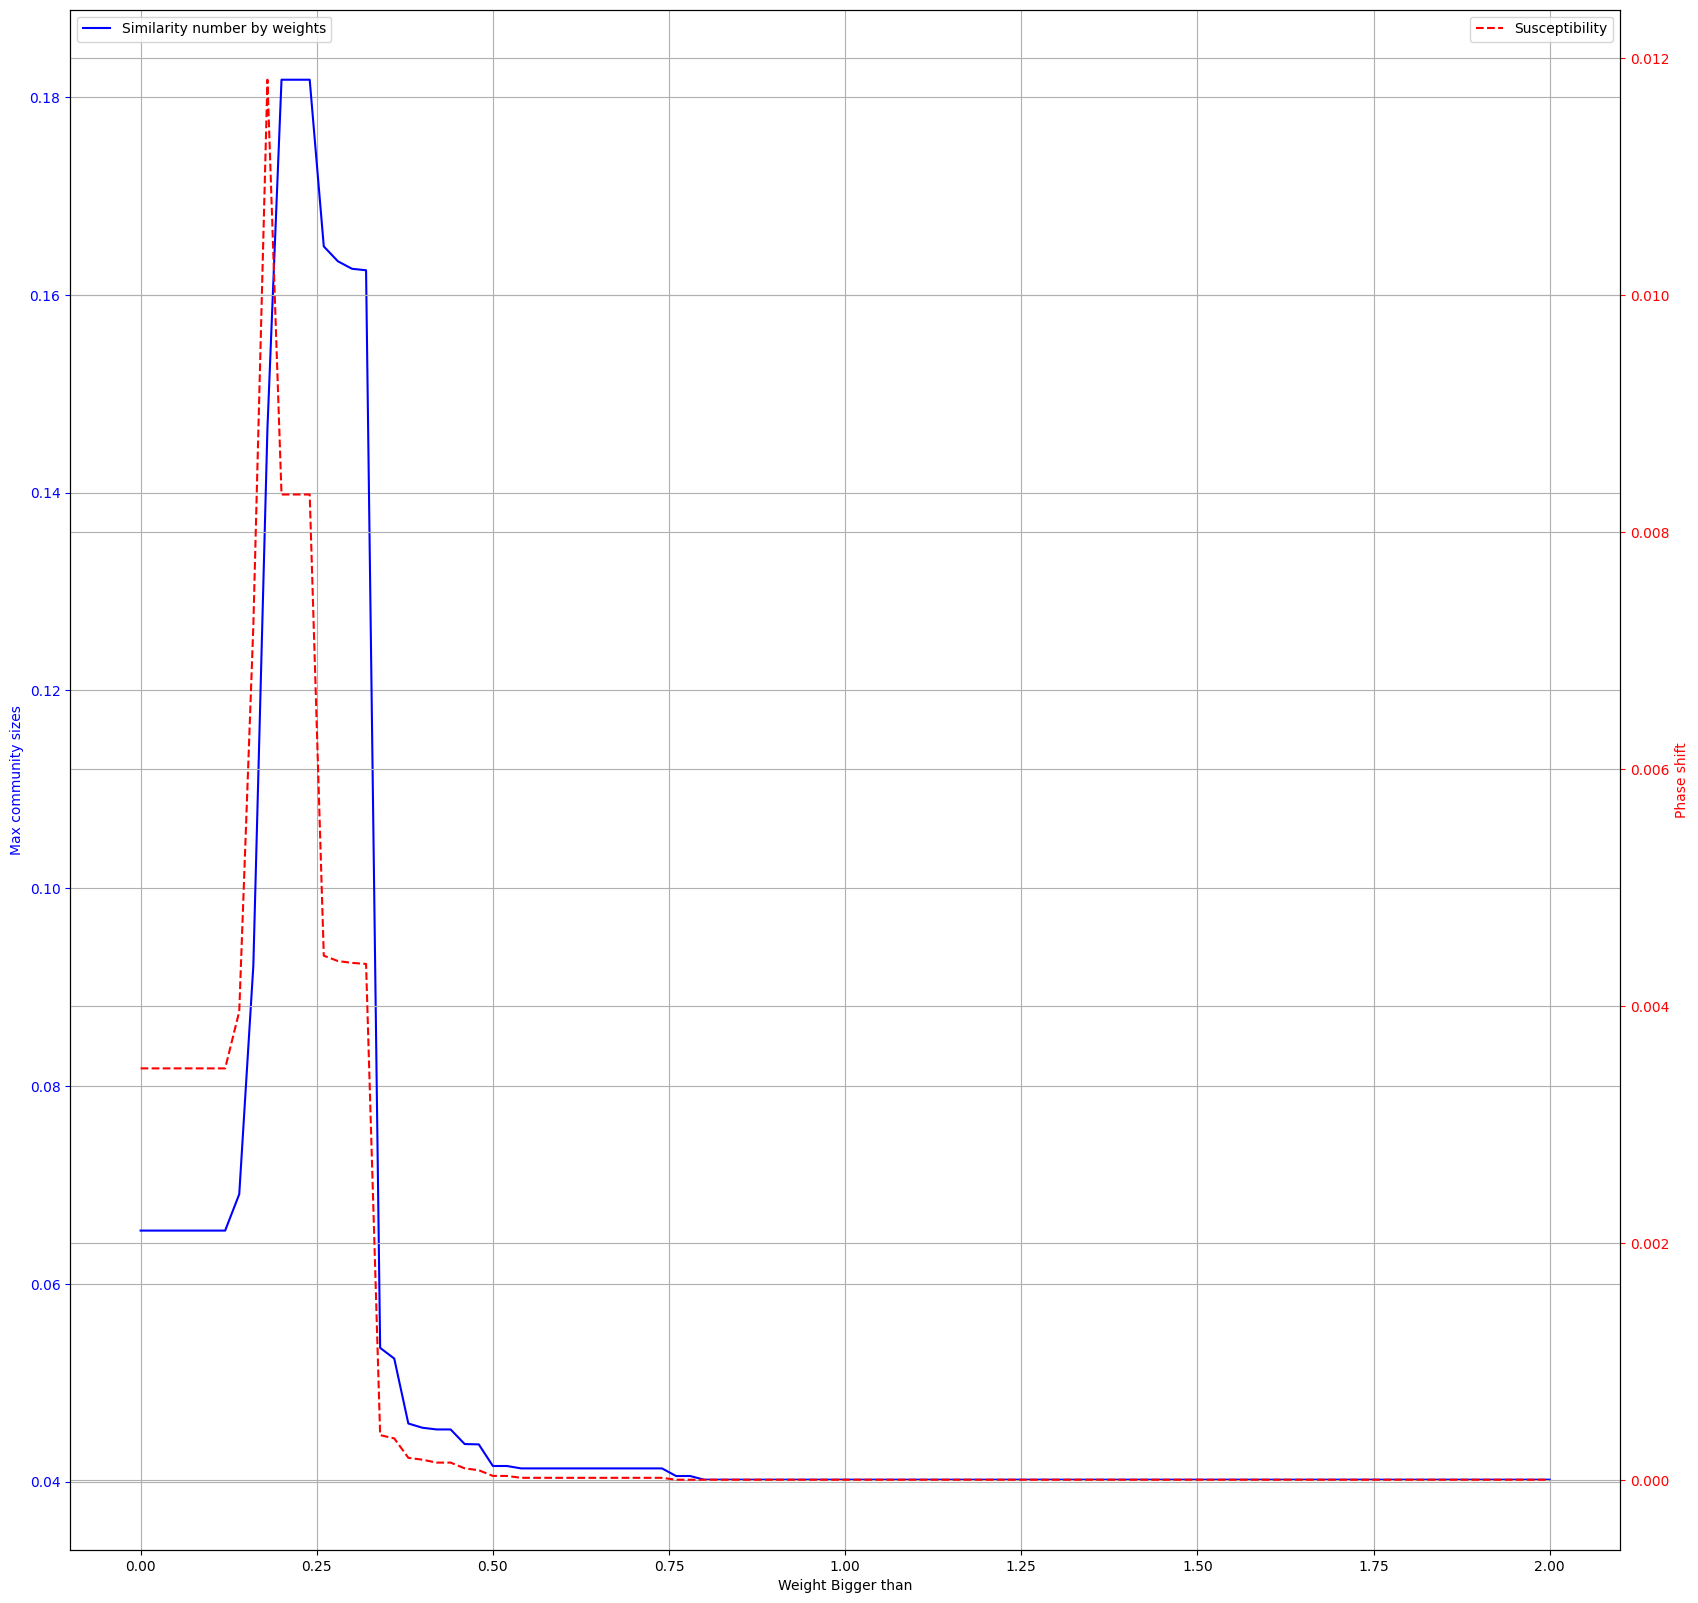

In [651]:
fig, ax = plt.subplots()

ax.plot(weightlist3, similarities4, color="blue", label = 'Similarity number by weights')                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue
plt.legend(loc = "upper left")

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist3, susceptibility4, color="red", linestyle = 'dashed', label = "Susceptibility")                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)
plt.legend()

plt.show()

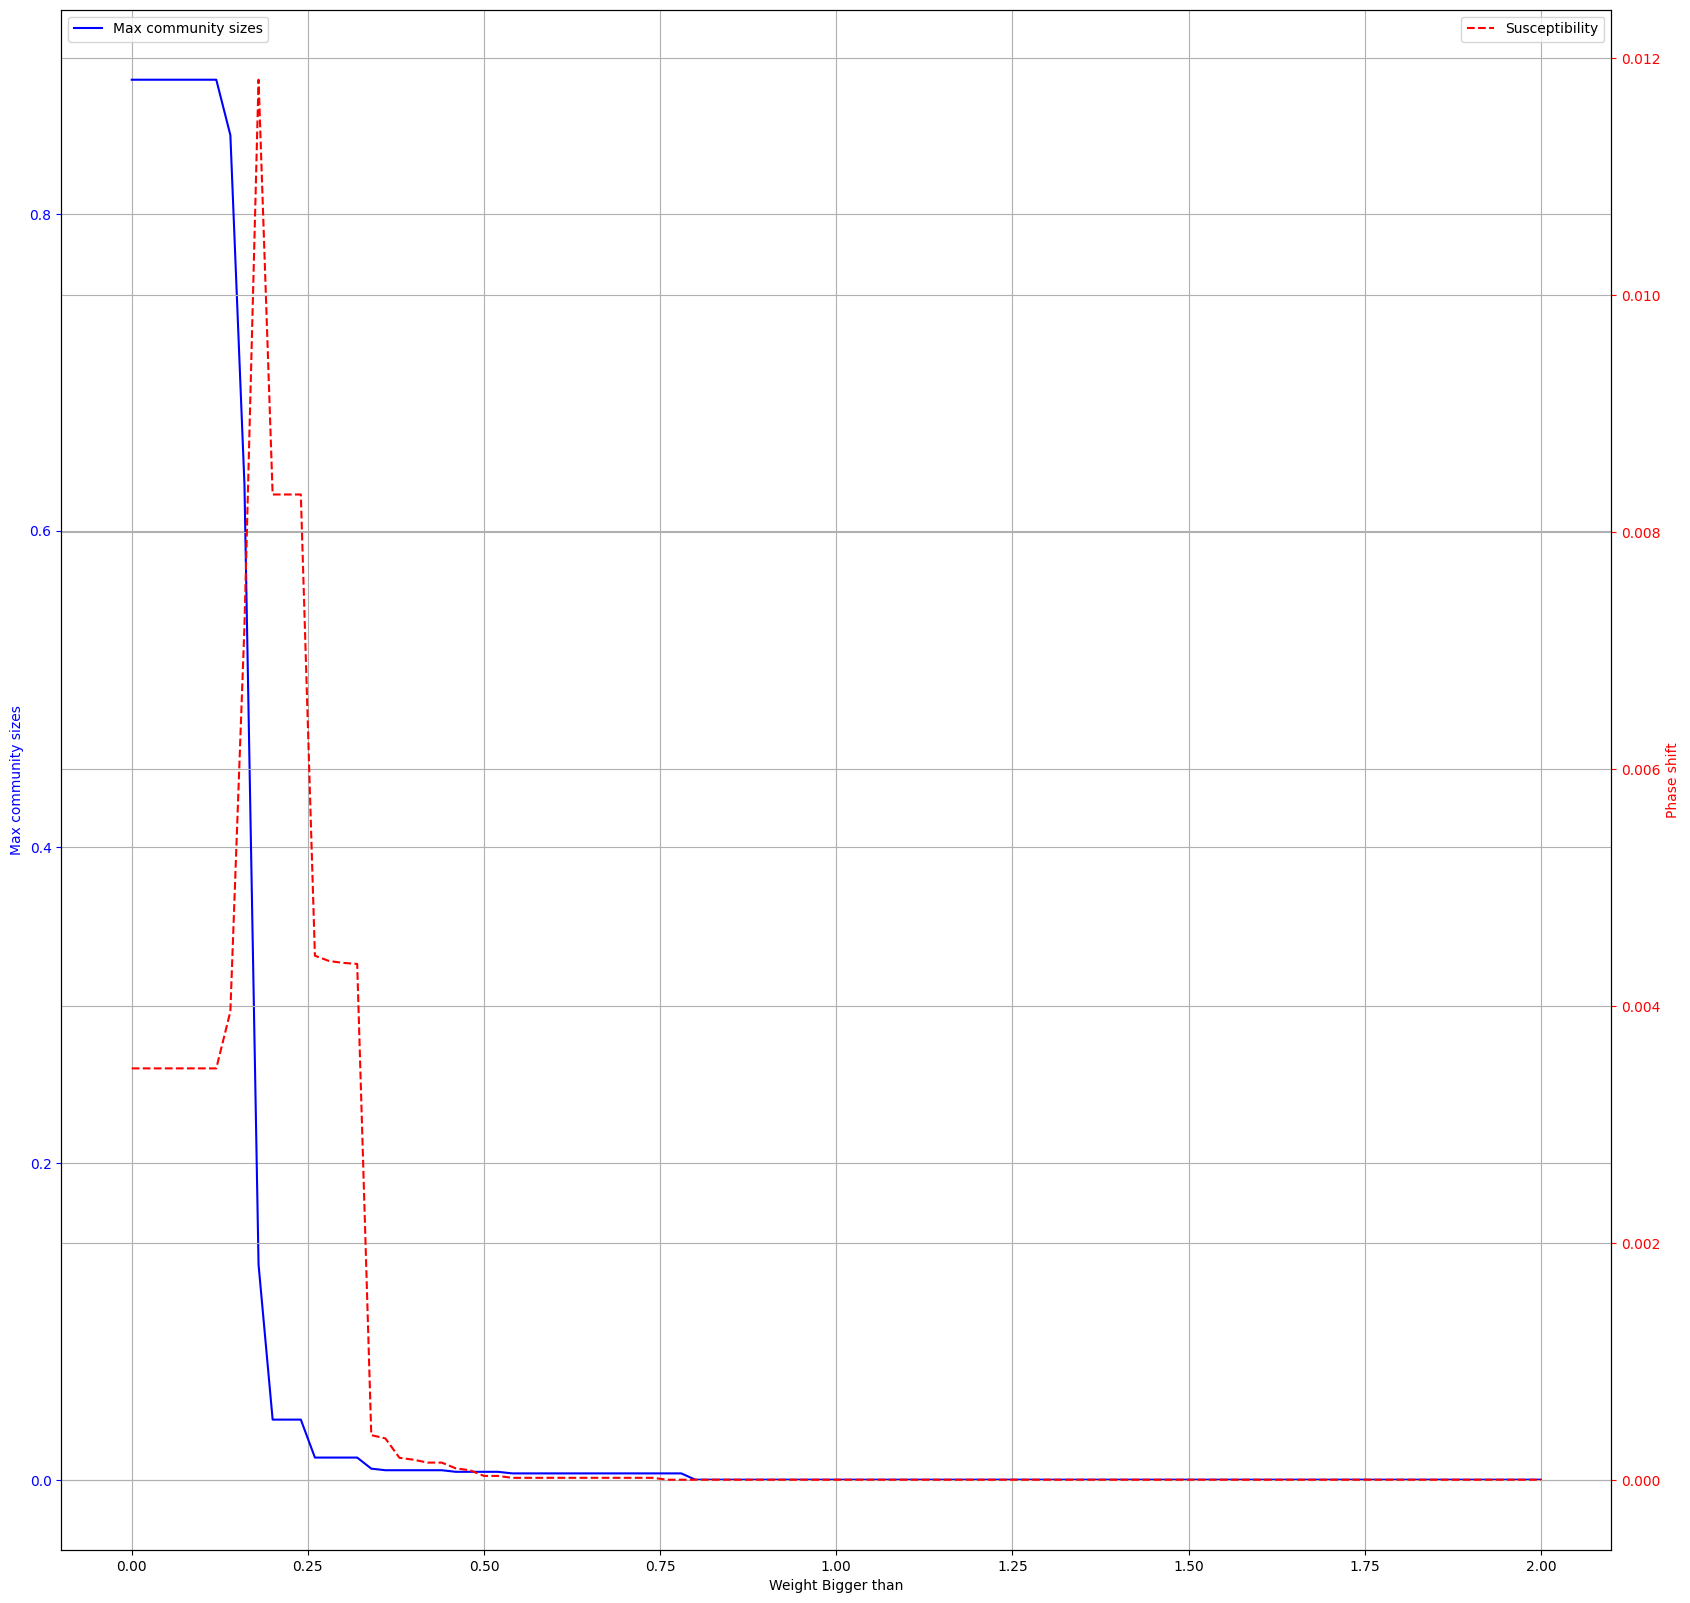

In [652]:
fig, ax = plt.subplots()

ax.plot(weightlist4, comm_maxes4, color="blue", label = "Max community sizes")                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue
plt.legend(loc = "upper left")

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist4, susceptibility4, color="red", linestyle = 'dashed', label = "Susceptibility")                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)
plt.legend()

plt.show()

In [653]:
len(weightlist3)

101

In [654]:
weightlist3

[0.0,
 0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5,
 0.52,
 0.54,
 0.56,
 0.58,
 0.6,
 0.62,
 0.64,
 0.66,
 0.68,
 0.7000000000000001,
 0.72,
 0.74,
 0.76,
 0.78,
 0.8,
 0.8200000000000001,
 0.84,
 0.86,
 0.88,
 0.9,
 0.92,
 0.9400000000000001,
 0.96,
 0.98,
 1.0,
 1.02,
 1.04,
 1.06,
 1.08,
 1.1,
 1.12,
 1.1400000000000001,
 1.16,
 1.18,
 1.2,
 1.22,
 1.24,
 1.26,
 1.28,
 1.3,
 1.32,
 1.34,
 1.36,
 1.3800000000000001,
 1.4000000000000001,
 1.42,
 1.44,
 1.46,
 1.48,
 1.5,
 1.52,
 1.54,
 1.56,
 1.58,
 1.6,
 1.62,
 1.6400000000000001,
 1.6600000000000001,
 1.68,
 1.7,
 1.72,
 1.74,
 1.76,
 1.78,
 1.8,
 1.82,
 1.84,
 1.86,
 1.8800000000000001,
 1.9000000000000001,
 1.92,
 1.94,
 1.96,
 1.98,
 2.0]